GRIP INTERNSHIP TASK 5 

Problem Statement : Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
You are the business owner of the retail firm and want to see how your company is performing.
You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [15]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#Loading the dataset
store=pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
#Data Exploration
store.shape

(9994, 13)

In [18]:
#Data information 
store.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [19]:
#describtion about the various stores in the dataset
store.describe()  

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
#finding if any null values
store.isnull().sum() 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [21]:
#check the no. of duplicated data if present
store.duplicated().sum()  

17

In [22]:
#dropping the duplicate dataset values
store.drop_duplicates(subset=None, keep='first', inplace=True) 

In [23]:
#rechecking for any duplicate value
store.duplicated().sum()

0

In [25]:
#updated dimension of dataset
store.shape

(9977, 13)

In [30]:
#Converting this feature into category data type
store['Postal Code']= store['Postal Code'].astype('category')

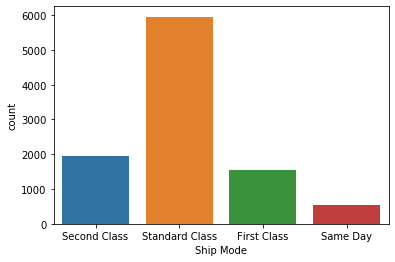

In [31]:
#Exploratory Data Analysis
sns.countplot(x=store['Ship Mode'])

From the above graph, we can say that maximum Ship Mode is of "Standard Class" and minimum is of "Same Day".

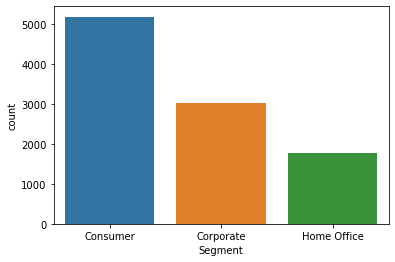

In [32]:
sns.countplot(x=store['Segment'])


We find that the max segment is of the "Consumer" and minimum is of "Home Office"

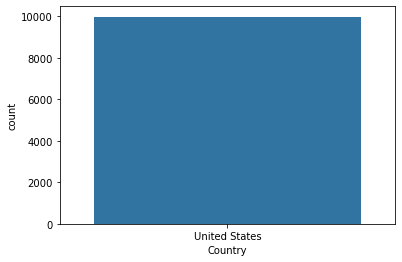

In [33]:
sns.countplot(x=store['Country'])

This shows the data contains the information only about "United States".

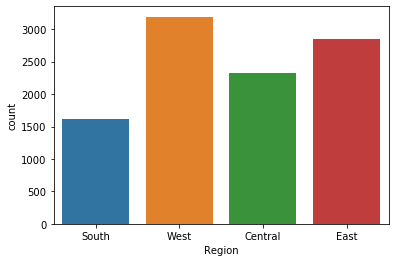

In [35]:
sns.countplot(x=store['Region'])

This shows the most of the entries are form the "West" Region of United States.

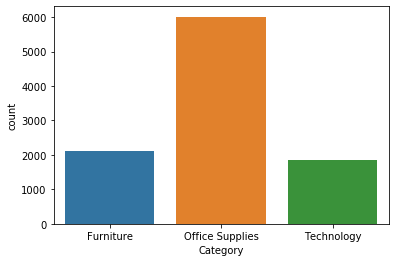

In [37]:
sns.countplot(x=store['Category'])

Most of the categories of data in the dataset are from "Office Supplies".

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

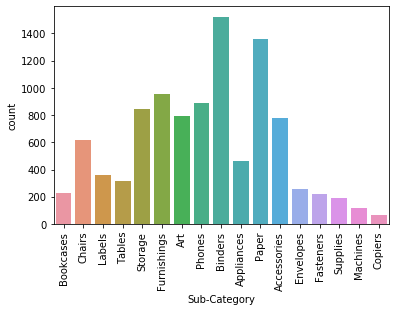

In [38]:
sns.countplot(x=store['Sub-Category'])
plt.xticks(rotation=90)

Maximum people are "Builders". Then comes "Paper" and the least number of people are "Copiers"

Text(0.5, 0, 'Profit')

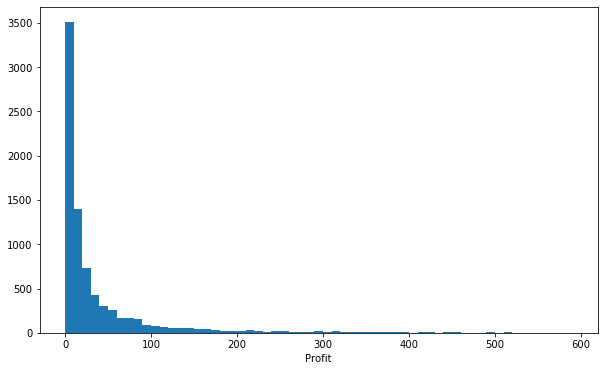

In [40]:
plt.figure(figsize=(10,6))
plt.hist(store['Profit'],bins=(np.arange(0,600,10)))
plt.xlabel("Profit")

Hence we find that maximum profit lies in the range of 0-100.

Text(0.5, 0, 'Sales')

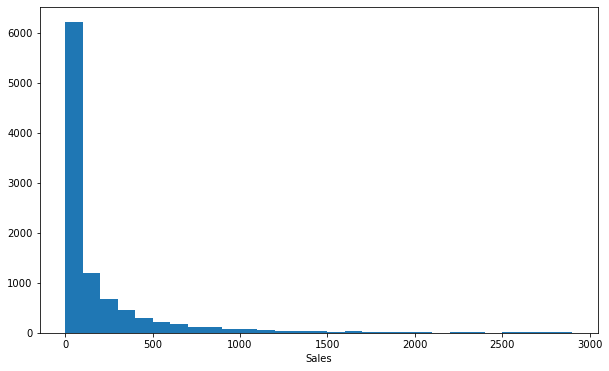

In [41]:
plt.figure(figsize=(10,6))
plt.hist(store['Sales'],bins=(np.arange(0,3000,100)))
plt.xlabel("Sales")

This shows that the maximum sales range from 0-400.

Text(0.5, 1.0, 'Depicting various categories')

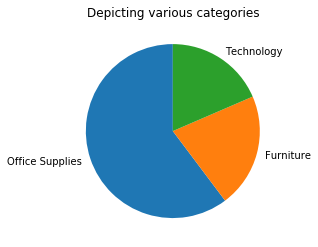

In [42]:
#after the sns graph,using pie chart we will do futher analaysis on major data
plt.pie(store['Category'].value_counts(),labels= store['Category'].value_counts().index, startangle=90)
plt.title("Depicting various categories")

This shows that the major category is the "Office supplies".

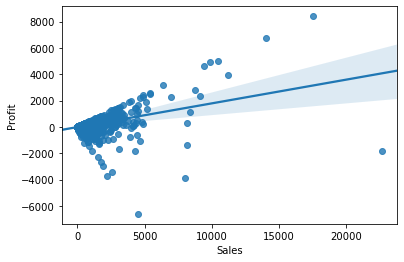

In [43]:
#relationship analysis of the given data values
sns.regplot(store['Sales'],store['Profit'])

The above regression plot shows that with increase with Sales, Profit also increases somehow. Since it is not in linear relation, we can't say that both are directly proportional

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200722 -0.028311  0.479067
Quantity  0.200722  1.000000  0.008678  0.066211
Discount -0.028311  0.008678  1.000000 -0.219662
Profit    0.479067  0.066211 -0.219662  1.000000


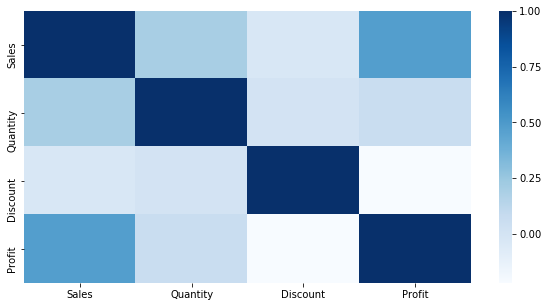

In [45]:
#Heatmap for the correlation between different features in the given dataset.
num_data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(10,5))
sns.heatmap(store[num_data].corr(), cmap="Blues")
corr_matrix=store.corr()
print(corr_matrix)

 "Profit"  is "-0.2197".
 "Discount" is : -0.028311 
Thus, we conclude by saying both have weak negative value as per the given statstics. 